## Third Lab

What we are going to do today:
- Introduce two optimizers for local search methods
- Use the optimizer with the methods defined before

This cell below is simply importing some useful stuff for later

In [2]:
import glob
import numpy as np
from matplotlib import pyplot as plt
from time import time as t

## Optimizers
### 2opt
As we saw last time, we have 12 problems and two have an optimal solution

## Solution

In [ ]:
import numpy as np

from src.utils import compute_length


def step2opt(solution, matrix_dist, distance):
    seq_length = len(solution) - 1
    tsp_sequence = np.array(solution)
    uncrosses = 0
    # TODO
    for i in range(1, seq_length - 1):
        for j in range(i + 1, seq_length):
            new_tsp_sequence = swap2opt(tsp_sequence, i, j)
            new_distance = distance + gain(i, j, tsp_sequence, matrix_dist)
            if new_distance < distance:
                uncrosses += 1
                tsp_sequence = np.copy(new_tsp_sequence)
                distance = new_distance
    # END TODO
    return tsp_sequence, distance, uncrosses


def swap2opt(tsp_sequence, i, j):
   # TODO
    new_tsp_sequence = np.copy(tsp_sequence)
    new_tsp_sequence[i:j + 1] = np.flip(tsp_sequence[i:j + 1], axis=0)  
    # END TODO
    return new_tsp_sequence


def gain(i, j, tsp_sequence, matrix_dist):
    old_link_len = (matrix_dist[tsp_sequence[i], tsp_sequence[i - 1]] + matrix_dist[
        tsp_sequence[j], tsp_sequence[j + 1]])
    changed_links_len = (matrix_dist[tsp_sequence[j], tsp_sequence[i - 1]] + matrix_dist[
        tsp_sequence[i], tsp_sequence[j + 1]])
    return - old_link_len + changed_links_len


def loop2opt(solution, instance, max_num_of_uncrosses=10000):
    matrix_dist = instance.dist_matrix
    new_len = compute_length(solution, matrix_dist)
    new_tsp_sequence = np.copy(np.array(solution))
    uncross = 0
    # TODO
    while uncross < max_num_of_uncrosses:
        new_tsp_sequence, new_reward, uncr_ = step2opt(new_tsp_sequence, matrix_dist, new_len)
        uncross += uncr_
        if new_reward < new_len:
            new_len = new_reward
        else:
            return new_tsp_sequence.tolist(), new_len, uncross

    return new_tsp_sequence.tolist(), new_len, uncross
    # END TODO

## Alessio Solution

In [ ]:
import numpy as np

from src.utils import compute_length

def step2opt(solution, matrix_dist, distance):
    seq_length = len(solution) - 1
    tsp_sequence = np.array(solution)
    uncrosses = 0
    # TODO
    best_distance = distance
    for i in range(1, seq_length - 1):
        for j in range(i + 1, seq_length):
            #code here, not sure if work
            if gain(i, j, tsp_sequence, matrix_dist) < 0:
                tsp_sequence = swap2opt(tsp_sequence, i, j)
                best_distance = compute_length(tsp_sequence,matrix_dist)
                uncrosses += gain(i, j, tsp_sequence, matrix_dist)
    # END TODO
    return tsp_sequence, best_distance, uncrosses

def swap2opt(tsp_sequence, i, j): # [1,3,2,4] i=1, j=2
    # TODO implemented, but need to test it
    old_tsp = np.copy(tsp_sequence) # [1,3,2,4]
    tmp = np.copy(old_tsp[i : j+1]) #from i to j the sequence is reverses # [3,2]
    tmp = np.flip(tmp) # [2,3]
    new_tsp_sequence = np.copy(old_tsp)
    new_tsp_sequence[i:j+1]=tmp # [1,2,3,4]
    # END TODO
    return new_tsp_sequence # [1,2,3,4]

def gain(i, j, tsp_sequence, matrix_dist):
    old_link_len = (matrix_dist[tsp_sequence[i], tsp_sequence[i - 1]] + matrix_dist[
        tsp_sequence[j], tsp_sequence[j + 1]])
    changed_links_len = (matrix_dist[tsp_sequence[j], tsp_sequence[i - 1]] + matrix_dist[
        tsp_sequence[i], tsp_sequence[j + 1]])
    return - old_link_len + changed_links_len

def loop2opt(solution, instance, max_num_of_uncrosses=10000):
    matrix_dist = instance.dist_matrix
    new_len = compute_length(solution, matrix_dist)
    new_tsp_sequence = np.copy(np.array(solution))
    uncross = 0
    # TODO
    while uncross < max_num_of_uncrosses:
        #code here, not sure if correct
        tmp_solution, tmp_distance, tmp_uncross = step2opt(new_tsp_sequence,matrix_dist,new_len)
        if tmp_distance < new_len:
            uncross += tmp_uncross
            new_tsp_sequence = tmp_solution
            new_len = tmp_distance
        else:
            return new_tsp_sequence, new_len, uncross
    return new_tsp_sequence, new_len, uncross
    # END TODO


#### Let's test it



#############################
name: eil76
nPoints: 76
best_sol: 538.0
exist optimal: True


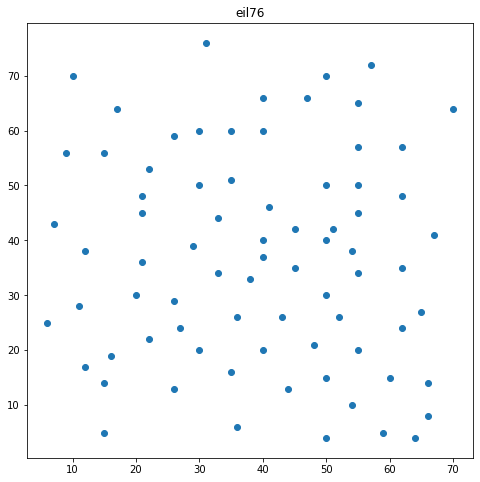

In [3]:
from src.io_tsp import ProblemInstance
example_problem = "../problems/eil76.tsp"
p_inst = ProblemInstance(example_problem)
p_inst.print_info()
p_inst.plot_data()

In [4]:
from src.TSP_solver import TSPSolver
from src.constructive_algorithms import (
    random_method,
    nearest_neighbor,
    best_nearest_neighbor,
    multi_fragment_mf
)

available_solvers = {
    "random": random_method,
    "nn":nearest_neighbor,
    "best_nn":best_nearest_neighbor,
    "multi_fragment": multi_fragment_mf
}

In [ ]:
solver = TSPSolver("nn", p_inst, available_solvers)
start = t()
solver.compute_solution(return_value=False, verbose=True)
end = t()

solver.plot_solution()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")
print(f"solution found has a {solver.gap} % gap")

start = t()
solution, new_length, uncross = loop2opt(solver.solution, p_inst)
end = t()
print(end -  start)
solver.method = "nn folowed by 2 opt"

assert solver.pass_and_check_if_solution_is_valid(solution), "Solution non valid"
solver.solved = True
solver.solution = solution
solver.plot_solution()
solver._gap()
print(f" {solver.gap} % gap")
print(f"with {uncross} number of uncrossed edges")

### 2.5opt

In [ ]:
import numpy as np

from src.utils import compute_length

def step2dot5opt(solution, matrix_dist, distance):
    seq_length = len(solution) - 2
    tsp_sequence = np.array(solution)
    uncrosses = 0
    for i in range(1, seq_length - 1):
        for j in range(i + 1, seq_length):
            #TODO
            # 2opt swap
            two_opt_tsp_sequence = swap2opt(tsp_sequence, i, j)
            two_opt_len = distance + gain(i, j, tsp_sequence, matrix_dist)
            # node shift 1
            first_shift_tsp_sequence = shift1(tsp_sequence, i, j)
            first_shift_len = distance + shift_gain1(i, j, tsp_sequence, matrix_dist)
            # node shift 2
            second_shift_tsp_sequence = shift2(tsp_sequence, i, j)
            second_shift_len = distance + shift_gain2(i, j, tsp_sequence, matrix_dist)

            best_len, best_method = min([two_opt_len, first_shift_len, second_shift_len]), np.argmin(
                [two_opt_len, first_shift_len, second_shift_len])
            sequences = [two_opt_tsp_sequence, first_shift_tsp_sequence, second_shift_tsp_sequence]
            if best_len < distance:
                uncrosses += 1
                tsp_sequence = sequences[best_method]
                distance = best_len
                # print(distance, best_method, [twoOpt_len, first_shift_len, second_shift_len])
            # END TODO
    return tsp_sequence, distance, uncrosses


def shift1(tsp_sequence, i, j):
    new_tsp_sequence = np.concatenate(
        [tsp_sequence[:i], tsp_sequence[i + 1: j + 1], [tsp_sequence[i]], tsp_sequence[j + 1:]])
    return new_tsp_sequence


def shift_gain1(i, j, tsp_sequence, matrix_dist):
    old_link_len = (matrix_dist[tsp_sequence[i], tsp_sequence[i - 1]] +
                    matrix_dist[tsp_sequence[i], tsp_sequence[i + 1]] +
                    matrix_dist[tsp_sequence[j], tsp_sequence[j + 1]])
    changed_links_len = (matrix_dist[tsp_sequence[i - 1], tsp_sequence[i + 1]] +
                         matrix_dist[tsp_sequence[i], tsp_sequence[j]]
                         + matrix_dist[tsp_sequence[i], tsp_sequence[j + 1]])
    return - old_link_len + changed_links_len


def shift2(tsp_sequence, i, j):
    new_tsp_sequence = np.concatenate(
        [tsp_sequence[:i], [tsp_sequence[j]], tsp_sequence[i: j], tsp_sequence[j + 1:]])
    return new_tsp_sequence


def shift_gain2(i, j, tsp_sequence, matrix_dist):
    old_link_len = (matrix_dist[tsp_sequence[i], tsp_sequence[i - 1]] + matrix_dist[
        tsp_sequence[j], tsp_sequence[j - 1]] + matrix_dist[tsp_sequence[j], tsp_sequence[j + 1]])
    changed_links_len = (
            matrix_dist[tsp_sequence[j], tsp_sequence[i - 1]] + matrix_dist[tsp_sequence[i], tsp_sequence[j]] +
            matrix_dist[tsp_sequence[j - 1], tsp_sequence[j + 1]])
    return - old_link_len + changed_links_len


def loop2dot5opt(solution, instance, max_num_of_changes=10000):
    matrix_dist = instance.dist_matrix
    actual_len = compute_length(solution, matrix_dist)
    new_tsp_sequence = np.copy(np.array(solution))
    uncross = 0
    while uncross < max_num_of_changes:
        # TODO
        new_tsp_sequence, new_len, uncr_ = step2dot5opt(new_tsp_sequence, matrix_dist, actual_len)
        uncross += uncr_
        # print(new_len, uncross)
        if new_len < actual_len:
            actual_len = new_len
        else:
            return new_tsp_sequence.tolist(), new_len, uncross
        # END TODO
    return new_tsp_sequence.tolist(), new_len, uncross

In [ ]:
solver = TSPSolver("nn", p_inst, available_solvers)
start = t()
solver.compute_solution(return_value=False, verbose=True)
end = t()

solver.plot_solution()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")
print(f"solution found has a {solver.gap} % gap")

start = t()
solution, new_length, uncross = loop2dot5opt(solver.solution, p_inst)
end = t()
print(end -  start)
solver.method = "nn folowed by 2.5 opt"

assert solver.pass_and_check_if_solution_is_valid(solution), "Solution non valid"
solver.solved = True
solver.solution = solution
solver.plot_solution()
solver._gap()
print(f" {solver.gap} % gap")
print(f"with {uncross} number of uncrossed edges")

### Let's analyse the performances of the optimizers and the algorithms discussed until now


In [ ]:
solver = TSPSolver("nn", p_inst, available_solvers)
start = t()
solver.compute_solution(return_value=False, verbose=True)
end = t()

solver.plot_solution()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")
print(f"solution found has a {solver.gap} % gap")

old_solution=solver.solution


start = t()
solution, new_length, uncross = loop2opt(old_solution, p_inst)
end = t()
print(end -  start)
solver.method = "nn folowed by 2 opt"

assert solver.pass_and_check_if_solution_is_valid(solution), "Solution non valid"
solver.solved = True
solver.solution = solution
solver.plot_solution()
solver._gap()
print(f" {solver.gap} % gap")
print(f"with {uncross} number of uncrossed edges")

start = t()
solution, new_length, uncross = loop2dot5opt(old_solution, p_inst)
end = t()
print(end -  start)
solver.method = "nn folowed by 2.5 opt"

assert solver.pass_and_check_if_solution_is_valid(solution), "Solution non valid"
solver.solved = True
solver.solution = solution
solver.plot_solution()
solver._gap()
print(f" {solver.gap} % gap")
print(f"with {uncross} number of uncrossed edges")

### Simulated Annealing


In [7]:
import numpy as np

from src.utils import compute_length


def sa(solution, instance, constant_temperature=0.95, iterations_for_each_temp=100):
    # initial setup
    temperature = instance.best_sol / np.sqrt(instance.nPoints)
    current_sol = np.array(solution)
    current_len = compute_length(solution, instance.dist_matrix)
    best_sol = np.array(solution)
    best_len = current_len

    # main loop
    while temperature > 0.001:
        # TODO
        for it in range(iterations_for_each_temp):
            next_sol, delta_E = random_sol_from_neigh(current_sol, instance)
            if delta_E < 0:
                current_sol = next_sol
                current_len += delta_E
                if current_len < best_len:
                    best_sol = current_sol
                    best_len = current_len
            else:
                r = np.random.uniform(0, 1)
                if r < np.exp(- delta_E / temperature):
                    current_sol = next_sol
                    current_len += delta_E

        temperature *= constant_temperature
    # END TODO
    return best_sol.tolist()


def random_sol_from_neigh(solution, instance):
    i, j = np.random.choice(np.arange(1, len(solution) - 1), 2, replace=False)
    i, j = np.sort([i, j])
    return sa_swap2opt(solution, i, j), gain(i, j, solution, instance.dist_matrix)


def sa_swap2opt(tsp_sequence, i, j):
    new_tsp_sequence = np.copy(tsp_sequence)
    new_tsp_sequence[i:j + 1] = np.flip(tsp_sequence[i:j + 1], axis=0)  # flip or swap ?
    return new_tsp_sequence


def gain(i, j, tsp_sequence, matrix_dist):
    old_link_len = (matrix_dist[tsp_sequence[i], tsp_sequence[i - 1]] + matrix_dist[
        tsp_sequence[j], tsp_sequence[j + 1]])
    changed_links_len = (matrix_dist[tsp_sequence[j], tsp_sequence[i - 1]] + matrix_dist[
        tsp_sequence[i], tsp_sequence[j + 1]])
    return - old_link_len + changed_links_len


### Jacob Solution


In [5]:
import numpy as np

from src.utils import compute_length


def sa(solution, instance, constant_temperature=0.95, iterations_for_each_temp=100):
    # initial setup
    temperature = instance.best_sol / np.sqrt(instance.nPoints)
    current_sol = np.array(solution)
    current_len = compute_length(solution, instance.dist_matrix) # 10
    best_sol = np.array(solution)
    best_len = current_len # 10

    # main loop
    while temperature > 0.001:
        # TODO
        for i in range(iterations_for_each_temp):
            next_sol, delta = random_sol_from_neigh(solution, instance) # delta = +2
            if delta < 0:
                current_sol = next_sol
                current_len += delta 
                if current_len < best_len: 
                    best_sol = next_sol
                    best_len = current_len 
            else:
                r = np.random.uniform(0,1)
                if r < np.exp(-delta/temperature):
                    current_sol = next_sol 
                    current_len += delta # 12
        temperature *= constant_temperature
    # END TODO
    return best_sol.tolist()


def random_sol_from_neigh(solution, instance):
    i, j = np.random.choice(np.arange(1, len(solution) - 1), 2, replace=False)
    i, j = np.sort([i, j])
    return sa_swap2opt(solution, i, j), gain(i, j, solution, instance.dist_matrix)


def sa_swap2opt(tsp_sequence, i, j):
    new_tsp_sequence = np.copy(tsp_sequence)
    new_tsp_sequence[i:j + 1] = np.flip(tsp_sequence[i:j + 1], axis=0)  # flip or swap ?
    return new_tsp_sequence


def gain(i, j, tsp_sequence, matrix_dist):
    old_link_len = (matrix_dist[tsp_sequence[i], tsp_sequence[i - 1]] + matrix_dist[
        tsp_sequence[j], tsp_sequence[j + 1]])
    changed_links_len = (matrix_dist[tsp_sequence[j], tsp_sequence[i - 1]] + matrix_dist[
        tsp_sequence[i], tsp_sequence[j + 1]])
    return - old_link_len + changed_links_len

###  solving with ['nn'] ####
Error the solution of nn for problem eil76 is not valid


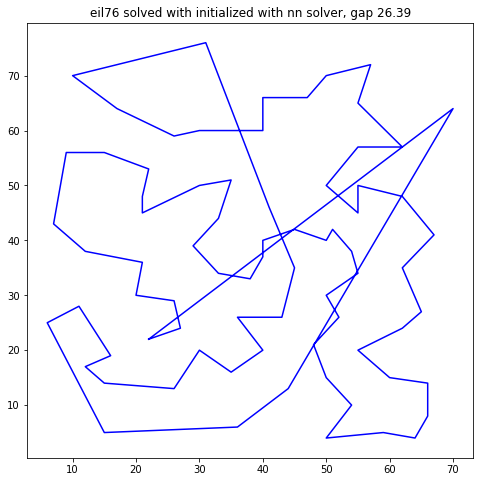

best solution with len 680.0 
with a total time of 0.003 seconds
solution found has a 26.39 % gap
1.2137324810028076


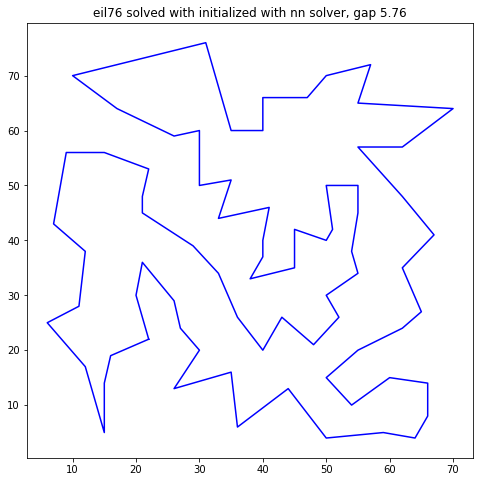

 5.76 % gap


In [8]:
solver = TSPSolver("nn", p_inst, available_solvers)
start = t()
solver.compute_solution(return_value=False, verbose=True)
end = t()

solver.plot_solution()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")
print(f"solution found has a {solver.gap} % gap")

start = t()
solution = sa(solver.solution, p_inst)
end = t()
print(end -  start)
solver.method = "nn folowed by SA"

assert solver.pass_and_check_if_solution_is_valid(solution), "Solution non valid"
solver.solved = True
solver.solution = solution
solver.plot_solution()
solver._gap()
print(f" {solver.gap} % gap")
